In [301]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [303]:
df = pd.read_csv('C:/Users/chira/Downloads/archive/uber.csv')

# Inspection
We will first examine the data, looking at various data samples, types, column renaming, and the discovery of missing values.

In [306]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [308]:
df = df.rename(columns={"Unnamed: 0": "Id"})
df = df.drop(columns = ['key'])

I renamed the "Unnamed: 0" column to "Id" and dropped the "key" column.

In [311]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


The info shows that the two cols has missing values. Let's find them.

In [316]:
missing_values = df.isnull().sum()
print(missing_values)

Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


The dropoff_longitued and dropoff_latitude column has 1 missing value. first we will identify and analyze it.



In [319]:
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


since this is only one row and passenger_count is also 0, and key is datatime it is a mistake and will remove it.

In [322]:
df = df.dropna()

print(df.isnull().sum())


Id                   0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


I dropped all rows with missing values and then printed the count of null values in each column, which should now all be zero.

In [325]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [326]:
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

#### Distance Column
Since we only have latitude and longitude and no distance column, let's make one using them instead.

In [328]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

In [329]:
df.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


## Exploratory Data Analysis (EDA)

In [331]:
df.describe()

,Id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


Fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, and passenger_count all have notable outliers. For instance, the fare_amount max is 499 (extremely high, an outlier) and the minimum is -52 (obviously an anomaly).

# Visualizations

<Axes: title={'center': 'distance in km'}, xlabel='distance_km'>

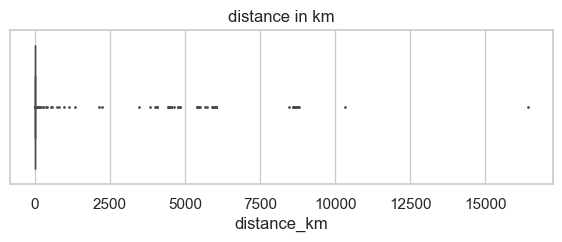

In [334]:
plt.figure(figsize=(7,2))
plt.title('distance in km')
sns.boxplot(data=df, x='distance_km', fliersize=1)

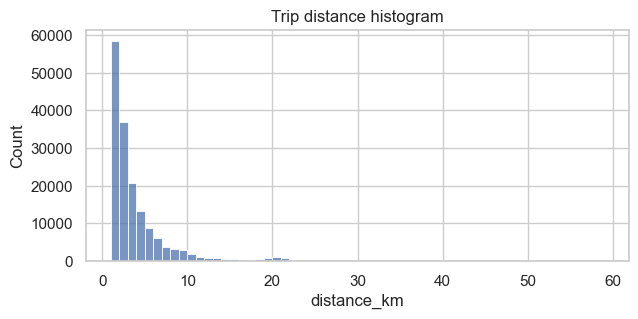

In [335]:
plt.figure(figsize=(7,3))
sns.histplot(df['distance_km'], bins=range(1,60,1))
plt.title('Trip distance histogram');

Most of the journeys had a distance of less than five kilometers, as the visualization demonstrates.

<Axes: title={'center': 'fare amount'}, xlabel='fare_amount'>

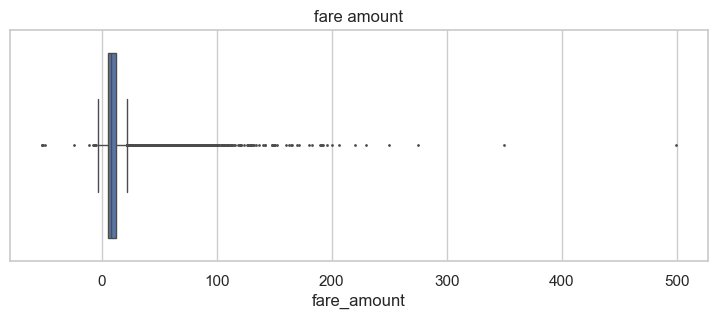

In [342]:
plt.figure(figsize=(9,3))
plt.title('fare amount')
sns.boxplot(data=df, x='fare_amount', fliersize=1)

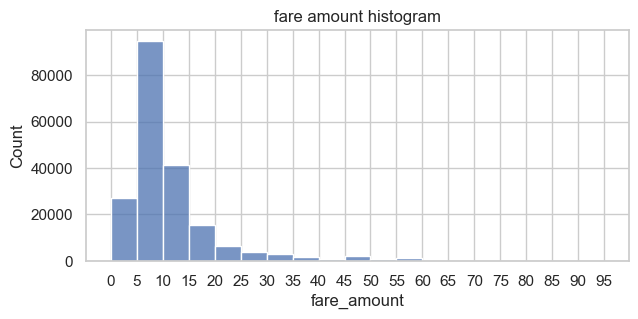

In [344]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['fare_amount'],bins=range(0,100,5))
ax.set_xticks(range(0,100,5))
ax.set_xticklabels(range(0,100,5))
plt.title('fare amount histogram');

There is a rightward bias in the fare amount. and the graphic indicates that most of the journeys have fares between 5 and 20.

<Axes: title={'center': 'passenger count'}, xlabel='passenger_count'>

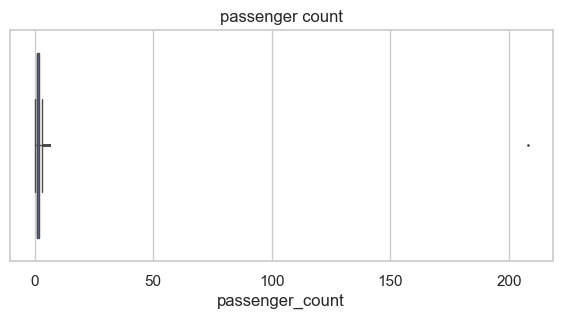

In [347]:
plt.figure(figsize=(7,3))
plt.title('passenger count')
sns.boxplot(data=df, x='passenger_count', fliersize=1)

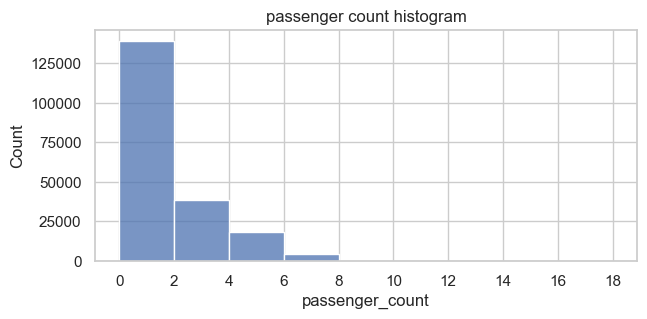

In [348]:
plt.figure(figsize=(7,3))
ax = sns.histplot(df['passenger_count'],bins=range(0,20,2))
ax.set_xticks(range(0,20,2))
ax.set_xticklabels(range(0,20,2))
plt.title('passenger count histogram');

Therefore the majority of passengers on each trip are two, and there can be up to eight passengers.

#### Mean amount by passenger

In [353]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

In [354]:
mean_fares_by_passenger_count = df.groupby(['passenger_count']).mean()[['fare_amount']]
mean_fares_by_passenger_count

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


C:\Users\chira\AppData\Local\Temp\ipykernel_8376\2052159329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,


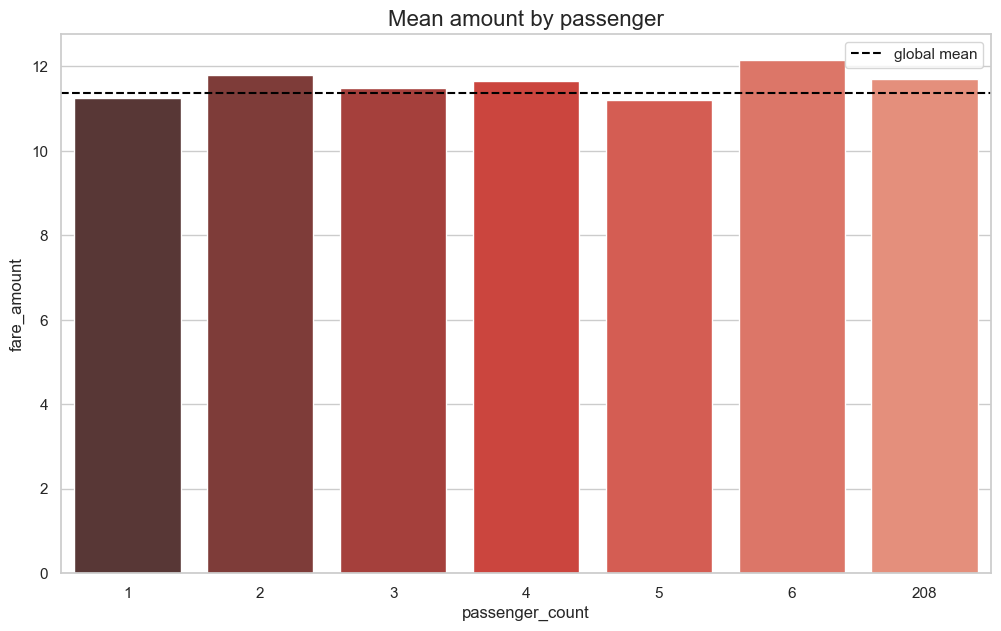

In [364]:
data = mean_fares_by_passenger_count.tail(-1)
pal = sns.color_palette("Reds_d", len(data))
rank = data['fare_amount'].argsort().argsort()


pal_list = list(pal[::-1])

plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                 y=data['fare_amount'],
                 palette=pal_list)  

ax.axhline(df['fare_amount'].mean(), ls='--', color='black', label='global mean')
ax.legend()
plt.title('Mean amount by passenger', fontsize=16)
plt.show()

#### Creating month and day columns

In [367]:
df['month'] = df['pickup_datetime'].dt.month_name()

df['day'] = df['pickup_datetime'].dt.day_name()

In [369]:
monthly_rides = df['month'].value_counts()
monthly_rides

month
May          18859
March        18763
April        18606
June         17787
January      17668
February     16695
October      16212
December     15516
November     15312
September    15266
July         15094
August       14221
Name: count, dtype: int64

In [371]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      17668
February     16695
March        18763
April        18606
May          18859
June         17787
July         15094
August       14221
September    15266
October      16212
November     15312
December     15516
Name: count, dtype: int64

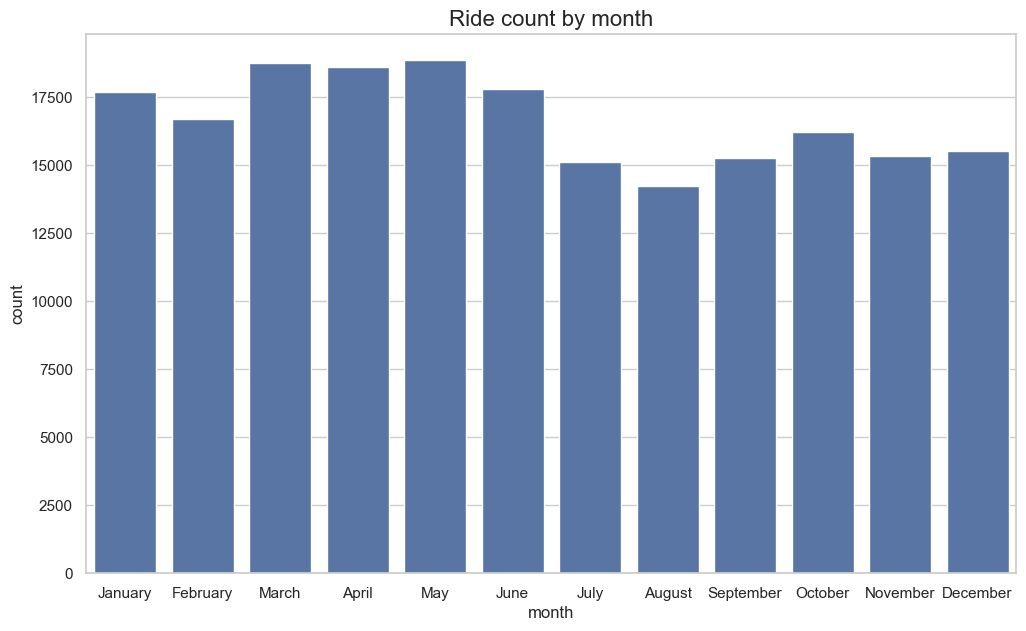

In [373]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

plt.title('Ride count by month', fontsize=16)
plt.show()


Although the monthly rides are regular, there are significant dips in July, August, and September over the summer.

### Analyzing rides by day

In [377]:
daily_rides = df['day'].value_counts()

In [379]:
day_order = ["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides.reindex(index=day_order)

day
Monday       25243
Tuesday      28126
Wednesday    29037
Thursday     30021
Friday       30880
Saturday     30251
Sunday       26441
Name: count, dtype: int64

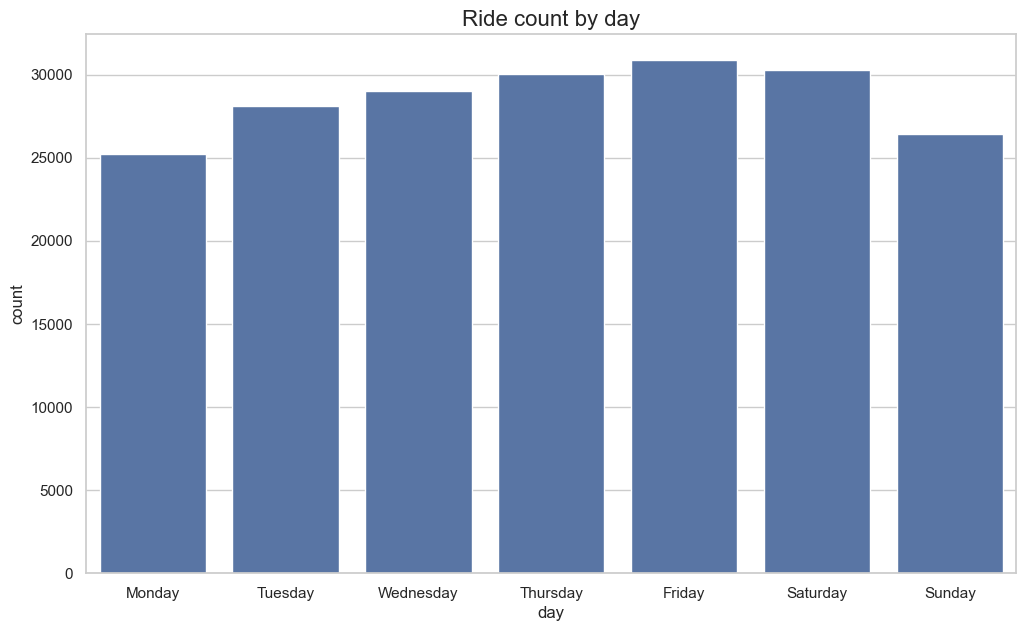

In [381]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, order=day_order)
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)

plt.title('Ride count by day', fontsize=16)
plt.show()


Due to vacations, there are less rides on Saturday and Sunday, and there are more rides on Monday, which is clearly the start of the week.

#### Revenue per day

In [385]:
df_without_date = df.drop(columns=['pickup_datetime'])

In [387]:
total_amount_per_day = df_without_date.groupby(by='day').sum()[['fare_amount']]
total_amount_per_day = total_amount_per_day.reindex(index=day_order)

In [388]:
total_amount_per_day

,fare_amount
day,
Monday,287228.19
Tuesday,311504.73
Wednesday,329608.38
Thursday,345774.92
Friday,353260.80
Saturday,333737.30
Sunday,310852.63


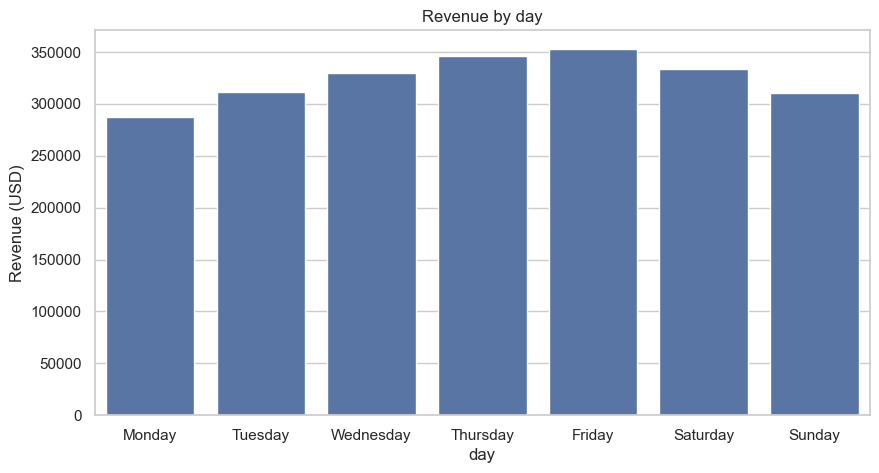

In [389]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=total_amount_per_day.index, y=total_amount_per_day['fare_amount'])
ax.set_xticks(range(len(total_amount_per_day.index)))
ax.set_xticklabels(day_order)
ax.set_ylabel("Revenue (USD)")
plt.title("Revenue by day")
plt.show()


#### Revenue by month

In [391]:
total_amount_per_month = df_without_date.groupby(by='month').sum()[['fare_amount']]
total_amount_per_month = total_amount_per_month.reindex(index=month_order)
total_amount_per_month

,fare_amount
month,
January,189499.77
February,182453.99
March,208300.37
April,210972.89
May,220246.02
June,206421.84
July,168454.49
August,159351.40
September,180011.21


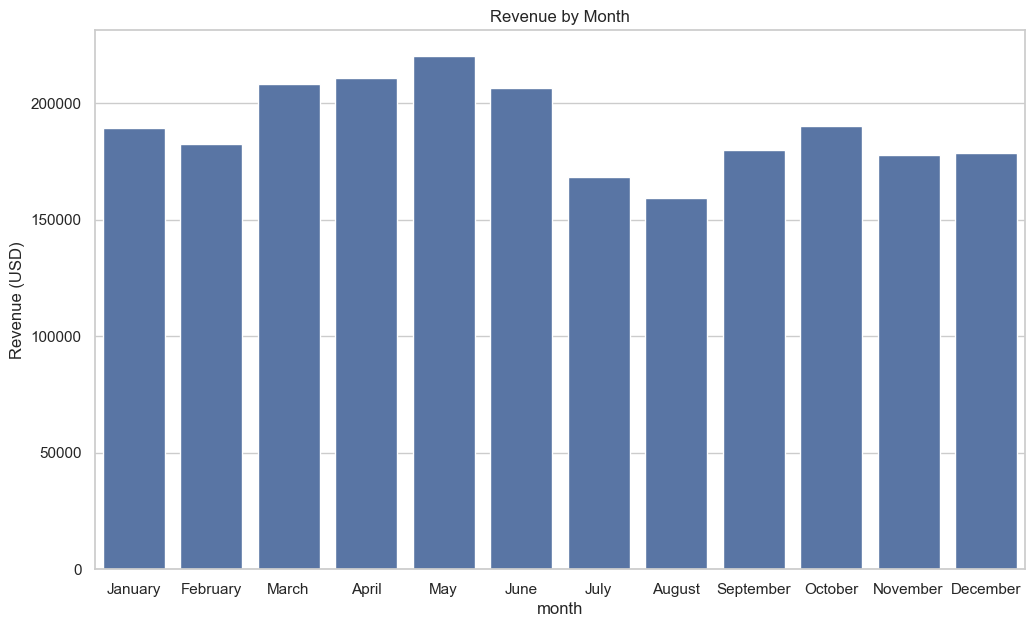

In [394]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=total_amount_per_month.index, y=total_amount_per_month['fare_amount'])
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order)

ax.set_ylabel("Revenue (USD)")
plt.title("Revenue by Month")
plt.show()


According to trips per month, the income per month indicates that the summer months of July, August, and September generate less money than the other months.

#### Hypothesis

In [398]:
from scipy import stats

In [399]:
df.describe()[['fare_amount','passenger_count']]

,fare_amount,passenger_count
count,199999.000000,199999.000000
mean,11.359892,1.684543
std,9.901760,1.385995
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [401]:
df.groupby('passenger_count')[['fare_amount']].mean()

,fare_amount
passenger_count,
0,9.439266
1,11.254158
2,11.784452
3,11.486731
4,11.642472
5,11.199698
6,12.158537
208,11.700000


As we can see, there is no correlation between the fare amount and the number of passengers, however this could be due to random sampling. Let us perform some hypothesis testing to determine the statistical significance of these numbers.

In [404]:
one_passenger = df[df['passenger_count'] == 1]['fare_amount']
two_passenger = df[df['passenger_count'] == 2]['fare_amount']
three_passenger = df[df['passenger_count'] == 3]['fare_amount']
four_passenger = df[df['passenger_count'] == 4]['fare_amount']
five_passenger = df[df['passenger_count'] == 5]['fare_amount']
six_passenger = df[df['passenger_count'] == 6]['fare_amount']

In [406]:
result = stats.f_oneway(one_passenger,two_passenger,three_passenger,four_passenger,five_passenger,six_passenger)
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

F-statistic: 21.20953546719199
p-value: 2.838724710616687e-21


We reject the null hypothesis and come to the conclusion that there is a significant difference in the average fare amount depending on the number of passengers because the p-value is less than significance threshold 0.05.

#### Linear Regression model

In [413]:
df1 = df.copy()
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,May,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,July,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,August,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,June,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,August,Thursday


In [415]:
df1.duplicated().sum()

0

In order to ensure that there are no duplicates or missing values, we will now locate and eliminate outliers from the data as they have an impact on the machine learning models.

In [418]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
df1['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

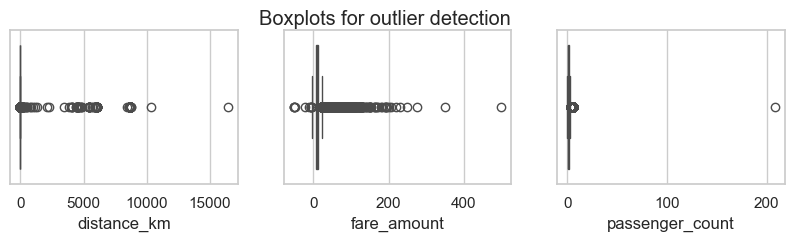

In [420]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df1['distance_km'])
sns.boxplot(ax=axes[1], x=df1['fare_amount'])
sns.boxplot(ax=axes[2], x=df1['passenger_count'])
plt.show();

so the fare_amount and distance has values in negatives also.

In [422]:
sorted(set(df1['distance_km']))[:20]

[0.0,
 8.419568071893166e-05,
 8.423069402055406e-05,
 8.42312035308615e-05,
 8.424394752893873e-05,
 8.424911813583716e-05,
 8.426156615572781e-05,
 8.427574220938168e-05,
 8.436769956638652e-05,
 8.437015960784889e-05,
 0.00011119492637690079,
 0.00011119492708422388,
 0.0001394835217174448,
 0.00013948519978913157,
 0.00013949023735687732,
 0.00013949356295481747,
 0.00013949521092014236,
 0.00013950389966036866,
 0.00013950408859824738,
 0.00013958636579235352]

In [423]:
sum(df1['distance_km']==0)

5632

In [424]:
df1['fare_amount'].describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [425]:
12.5 + (9 * (12.5-6))

71.0

In [426]:
def outlier_imputer(df, column_list, iqr_factor):
    df_copy = df.copy()  
    
    for col in column_list:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        lower_threshold = q1 - (iqr_factor * iqr)
        
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        
        print('q1:', q1)
        print('lower_threshold:', lower_threshold)

        # Filter out outliers
        df_copy = df_copy[(df_copy[col] <= upper_threshold) & (df_copy[col] >= lower_threshold)]
        print(df_copy[col].describe())
        print()
    
    return df_copy

In [427]:
df1 = outlier_imputer(df1, ['fare_amount','distance_km','passenger_count'], 1.5)

fare_amount
q3: 12.5
upper_threshold: 22.25
q1: 6.0
lower_threshold: -3.75
count    182833.000000
mean          8.940095
std           4.143264
min          -3.500000
25%           5.700000
50%           8.000000
75%          11.000000
max          22.200000
Name: fare_amount, dtype: float64

distance_km
q3: 3.2827774817668756
upper_threshold: 6.4631959656428295
q1: 1.1624984925162398
lower_threshold: -2.0179199913597143
count    174540.000000
mean          2.218767
std           1.454764
min           0.000000
25%           1.131295
50%           1.876565
75%           3.030305
max           6.463182
Name: distance_km, dtype: float64

passenger_count
q3: 2.0
upper_threshold: 3.5
q1: 1.0
lower_threshold: -0.5
count    154869.000000
mean          1.259942
std           0.548312
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: passenger_count, dtype: float64



In [428]:
df1.shape

(154869, 11)

Now we have date, month and day columns let's lower case them and find rush hours in the data.

In [437]:
df1.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day'],
      dtype='object')

In [439]:
df1['day'] = df1['day'].str.lower()
df1['month'] = df1['pickup_datetime'].dt.strftime('%b').str.lower()
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday


In [441]:
df1['rush_hour'] = df1['pickup_datetime'].dt.hour
df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,19
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,20
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,21
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,8
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,2


In [442]:
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [443]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1).astype('int32')

df1.head()

,Id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,day,rush_hour
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,may,thursday,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,jul,friday,0
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,aug,monday,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,jun,friday,1
5,44470845,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000,feb,saturday,0


In [444]:
df1.columns

Index(['Id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'month', 'day', 'rush_hour'],
      dtype='object')

In [445]:
df2 = df1.drop(['Id', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','day', 'month'],axis=1)
df2.head()

,fare_amount,passenger_count,distance_km,rush_hour
0,7.5,1,1.683323,1
1,7.7,1,2.457590,0
2,12.9,1,5.036377,0
3,5.3,3,1.661683,1
5,4.9,1,0.000000,0


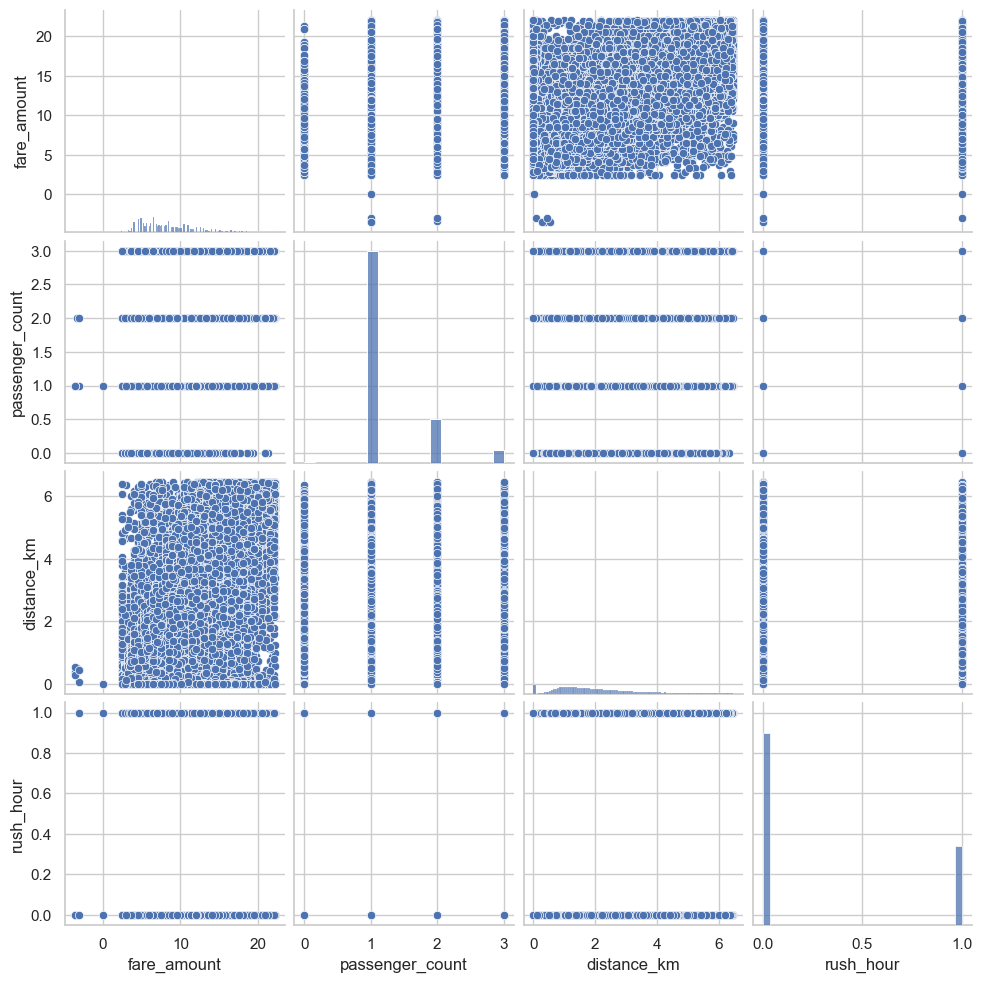

In [446]:
sns.pairplot(df2);

In [447]:
df2.corr(method='pearson')

,fare_amount,passenger_count,distance_km,rush_hour
fare_amount,1.000000,0.018304,0.754841,-0.010957
passenger_count,0.018304,1.000000,0.012573,-0.057370
distance_km,0.754841,0.012573,1.000000,-0.040627
rush_hour,-0.010957,-0.057370,-0.040627,1.000000


In [450]:
df2['rush_hour'] = df2['rush_hour'].astype(float)
df2.shape

(154869, 4)

In [452]:
df2 = df2[df2['distance_km']!=0].reindex()
df2.shape

(150334, 4)

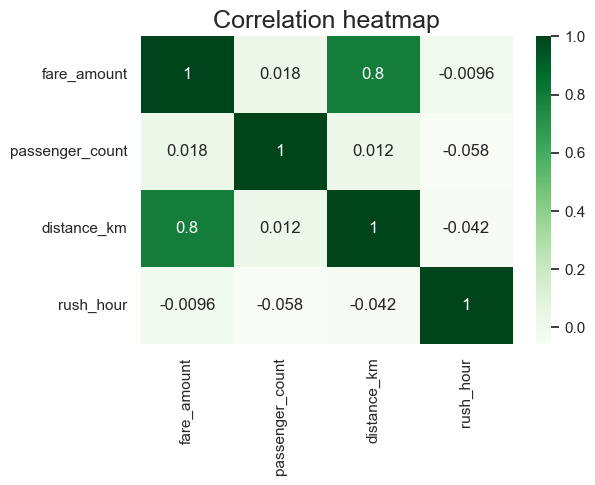

In [453]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Greens')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

In [454]:
X = df2.drop(columns=['fare_amount'])

y = df2[['fare_amount']]
X.head()

,passenger_count,distance_km,rush_hour
0,1,1.683323,1.0
1,1,2.457590,0.0
2,1,5.036377,0.0
3,3,1.661683,1.0
8,1,2.332711,1.0


In [455]:
X[X['distance_km']==0].head()

,passenger_count,distance_km,rush_hour


In [456]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [458]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.47525458  0.04439963 -0.64148809]
 [-0.47525458 -0.27870613  1.55887541]
 [-0.47525458  0.20015523 -0.64148809]
 ...
 [-0.47525458  2.0666192   1.55887541]
 [ 1.34715627  0.36458155 -0.64148809]
 [-0.47525458 -0.9281082  -0.64148809]]


In [459]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [460]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.6349451317288373
R^2: 0.6349451317288373
MAE: 1.607698085551465
MSE: 5.030403418185143
RMSE: 2.242856085036475


In [464]:
X_test_scaled = scaler.transform(X_test)

In [465]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.6159635492896861
R^2: 0.6159635492896861
MAE: 1.6359273588427354
MSE: 5.305738442177698
RMSE: 2.3034188594733913


In [466]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
43530,5.7,6.733581,-1.033581
25500,8.5,8.026261,0.473739
144453,5.0,5.611058,-0.611058
14117,4.5,5.888021,-1.388021
155218,4.9,5.886377,-0.986377


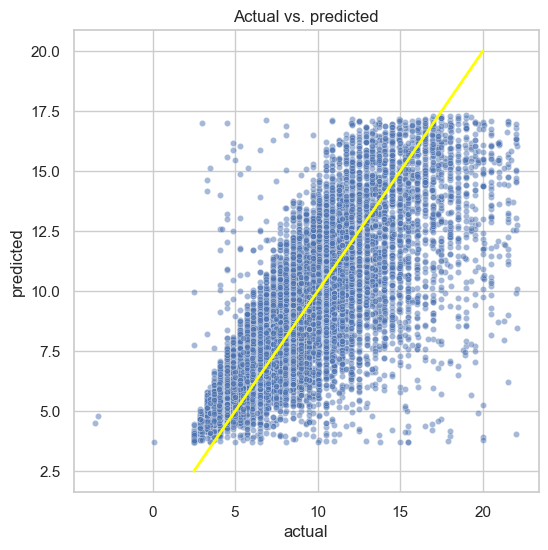

In [467]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)

plt.plot([2.5,20], [2.5,20], c='yellow', linewidth=2)
plt.title('Actual vs. predicted');

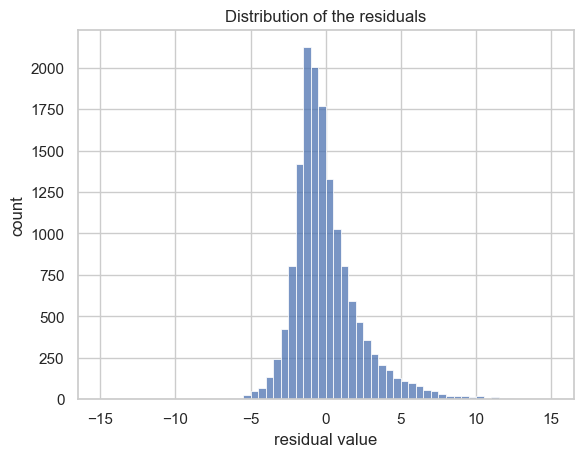

In [468]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [469]:
results['residual'].mean()

-0.008943627953387448

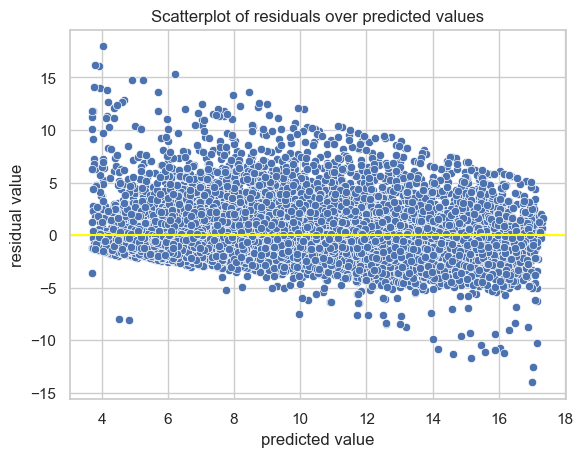

In [470]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='yellow')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [471]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,distance_km,rush_hour
0,0.034787,2.959849,0.092767


In [472]:
print(X_train['distance_km'].std())

# 2. Divide the model coefficient by the standard deviation
print(2.959849 / X_train['distance_km'].std())

1.4223114110654371
2.081013325895214
